<h1>Heart Disease Prediction</h1>
This notebook utilizes logistic regression to predict heart disease presence based on patient data, including training, evaluation, and interactive prediction functionality.

<h3>Step 1: Importing Libraries</h3>

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Importing essential libraries such as NumPy, Pandas, scikit-learn for machine learning, 
# Matplotlib for plotting, and Seaborn for enhanced data visualization.

 <h3>Step 2: Loading Data</h3>

In [12]:
heartdata = pd.read_csv("heart.csv")

# Reading a CSV file named “heart.csv” into a Pandas DataFrame named heartdata.

<h3>Step 3: Exploring Data</h3>

In [13]:
print(heartdata.head())
print(heartdata.tail())
print(heartdata.info())
print(heartdata.describe())

# Displaying the first and last few rows of the dataset, providing information about the dataset (data types, missing values), 
# and offering summary statistics.

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0

<h3>Step 4: Data Preprocessing</h3>

In [14]:
X = heartdata.drop(columns='target', axis=1)
Y = heartdata['target']

# Separating the features (X) and the target variable (Y) from the dataset.

<h3>Step 5: Train-Test Split</h3>

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Splitting the data into training and testing sets using `train_test_split`. 
# The data is stratified to maintain the distribution of the target variable.

<h3>Step 6: Model Training</h3>

In [16]:
model = LogisticRegression(max_iter=10000, solver='liblinear')  # Increased max_iter and changed solver
model.fit(X_train, Y_train)

# Creating a logistic regression model and training it on the training data.


LogisticRegression(max_iter=10000, solver='liblinear')

<h3>Step 7: Model Evaluation on Test Data</h3>

In [17]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(f"Training data accuracy: {training_data_accuracy:.2f}")

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(f"Test data accuracy: {test_data_accuracy:.2f}")

Training data accuracy: 0.85
Test data accuracy: 0.80


<h3>Making Predictions (Modified for User Input)</h3>

In [18]:
print("Enter patient details for prediction:")
age = int(input("Age: "))
sex = int(input("Sex (0 for female, 1 for male): "))
cp = int(input("Chest pain type (0-3): "))
trestbps = int(input("Resting blood pressure (mm Hg): "))
chol = int(input("Serum cholesterol (mg/dl): "))
fbs = int(input("Fasting blood sugar > 120 mg/dl (1 = true; 0 = false): "))
restecg = int(input("Resting electrocardiographic results (0-2): "))
thalach = int(input("Maximum heart rate achieved: "))
exang = int(input("Exercise induced angina (1 = yes; 0 = no): "))
oldpeak = float(input("ST depression induced by exercise relative to rest: "))
slope = int(input("Slope of the peak exercise ST segment (0-2): "))
ca = int(input("Number of major vessels (0-3) colored by fluoroscopy: "))
thal = int(input("Thalassemia (1-3): "))

# Creating a DataFrame from user input
input_from_user = {
    'age': [age],
    'sex': [sex],
    'cp': [cp],
    'trestbps': [trestbps],
    'chol': [chol],
    'fbs': [fbs],
    'restecg': [restecg],
    'thalach': [thalach],
    'exang': [exang],
    'oldpeak': [oldpeak],
    'slope': [slope],
    'ca': [ca],
    'thal': [thal]
}

input_from_user_df = pd.DataFrame(input_from_user)

# Making prediction
prediction = model.predict(input_from_user_df)

if prediction[0] == 1:
    print("The model predicts that the patient has heart disease.")
else:
    print("The model predicts that the patient does not have heart disease.")


Enter patient details for prediction:
The model predicts that the patient has heart disease.


<h3>Step 9: ROC Curve and AUC</h3>

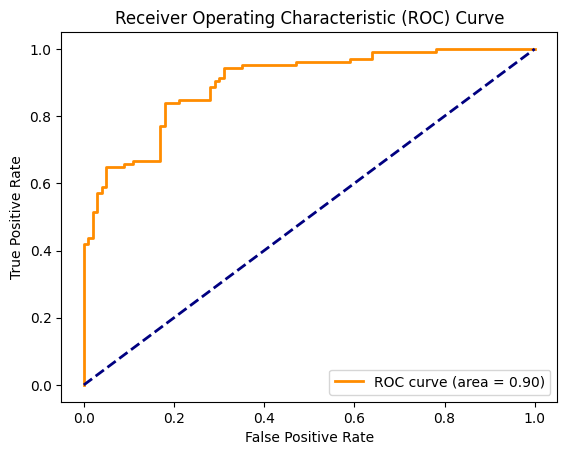

In [19]:
Y_test_probabilities = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, Y_test_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Generating and plotting the Receiver Operating Characteristic (ROC) curve 
# and calculating the Area Under Curve (AUC) for model evaluation.